Will add proper titles and explanations when I am done fully done with each forecasting model.

In [2]:
import numpy as np
import requests
import pandas as pd
import random
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
seed_value = 52
# torch.manual_seed(seed_value) 
random.seed(seed_value)
np.random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)

In [4]:
data = pd.read_csv(r"csv file path here")


In [ ]:
print(data)

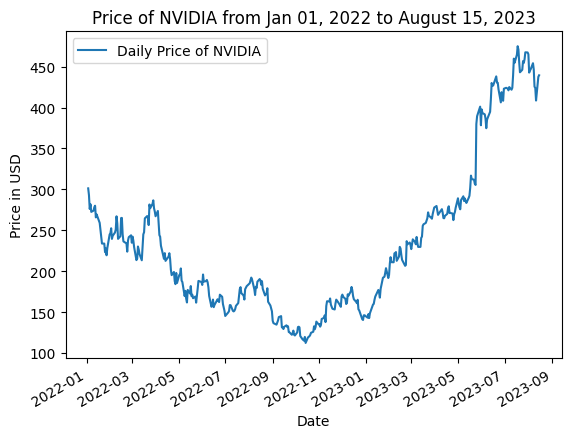

In [5]:
# Set date column from df as the df's index
data["Date"] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot the data
data["Close"].plot(linestyle='-')
plt.title("Price of NVIDIA from Jan 01, 2022 to August 15, 2023")
plt.legend(['Daily Price of NVIDIA'])
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.show()

Models to use for forecasting
- Regression (AR model)
- Smoothing models
- ARMA/ARIMA
- LSTM
- Maybe up down forecast w Logit?

Determining optimal lag order. 
- Could use AR/ARIMA optimal order as a place to start
- Could add 10 lags and trim off statistically insignificant lags

Regardless select the proper model using MSE as your critera


In [40]:
#Convert price data to np array for quicker calculations
price_data = np.array(data["Close"])

#Check shape
print(price_data.shape)

(406,)


Note: Scikit-learn expects input data to be in the form of a 2D array or matrix, where each row represents a sample and each column represents a feature. Currently, the numpy array is a 1D array, and needs to be reshaped. 
However, in this notebook it is not necessary, because of the way I create my data set in the code block below. If you don't create your datasets the way I do, then this is all you need: 

    price_data = price_data.reshape(-1,1)

    Reshaping the numpy array treats each time step in the time series to be treated as its own sample and feature. The -1 in the numpy array tells numpy to automatically calculate the dimensions (in this case, number of elements) in the original array, avoiding the need to calculate this number yourself. 

Split the data into a training and testing split. The model being currently created is an AR(1) model, but this was chosen arbitrarly and not the optimal model structure.

In [49]:
#split the data into a train-test split (arbitrary split)
train_size = int(len(price_data) * 0.80)
train, test = price_data[:train_size], price_data[train_size:]

def create_dataset(dataset, lookback):
    """
    Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction

    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        inputs = dataset[i:i+lookback]
        labels = dataset[i+lookback:i+lookback+1]
        X.append(inputs)
        y.append(labels)
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, 1)
X_test, y_test = create_dataset(test, 1)

In [50]:
#Change shape of labels to 1D np.array
y_train = y_train.ravel()
y_test = y_test.ravel()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(323, 1)
(323, 1)
(81, 1)
(81, 1)


In [45]:
#Implement AR(p) model

model = SGDRegressor(max_iter=1000)
model.fit(X_train, y_train)
print(model)
print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")



SGDRegressor()
number of iterations completed: 104, number of weight updates: 33593.0


In [ ]:
predictions = model.predict(X_test)
print(predictions)

Error: Predictions are too large. There is a bug in the code

BeautifulSoup next day's price updates


In [ ]:
url = "https://www.marketwatch.com/investing/stock/nvda"
response = requests.get(url)
html_content = response.content

#Create beautiful soup object and find the price
soup = BeautifulSoup(html_content, "html.parser")

price = soup.find("div", class_="region region--intraday").find("bg-quote", class_="value").string

print(price)